Link: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/geographic-vs-projected-coordinate-reference-systems-python/

In [7]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et
import seaborn as sns

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Проекция Меркатора: https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%9C%D0%B5%D1%80%D0%BA%D0%B0%D1%82%D0%BE%D1%80%D0%B0

QGIS about CRS: https://docs.qgis.org/testing/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

In [8]:
boulder_df = np.array([[476911.31,  4429455.35]])
geometry = [Point(xy) for xy in boulder_df]

boulder_loc = gpd.GeoDataFrame(geometry,
                               columns=['geometry'],
                               crs={'init': 'epsg:2957'})

/Users/a18570724/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


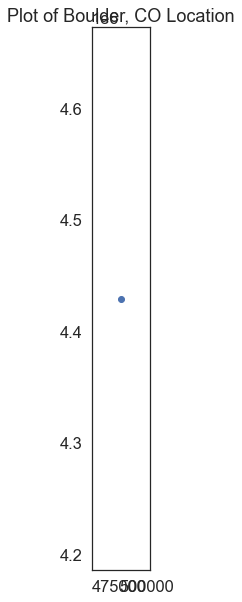

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
boulder_loc.plot(ax=ax)
ax.set_title("Plot of Boulder, CO Location")

# Turn off scientific notation
plt.ticklabel_format(useOffset=False)
plt.show()

In [10]:
# View crs
boulder_loc.crs

<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - 108°W to 102°W
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
boulder_df

array([[ 476911.31, 4429455.35]])

In [15]:
boulder_df_geog = boulder_loc.to_crs(epsg=4326)

In [16]:
boulder_df_geog

,geometry
0,POINT (-105.27055 40.01498)


In [17]:
boulder_loc

,geometry
0,POINT (476911.310 4429455.350)


In [5]:
# Reproject the data to WGS84
boulder_df_geog = boulder_loc.to_crs(epsg=4326)
boulder_df_geog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# View the coordinate values of the newly reprojected data.
boulder_df_geog

,geometry
0,POINT (-105.27055 40.01498)


In [ ]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

worldBound.plot(cmap='Greys',
                ax=ax)

ax.set(title="World map with Boulder, CO location \n Geographic WGS84 CRS",
       xlabel="X Coordinates (Decimal Degrees)",
       ylabel="Y Coordinates (Decimal Degrees)")

boulder_df_geog.plot(ax=ax,
                     markersize=52,
                     color='springgreen')
plt.show()

To decide if a projection is right for your data, answer these questions:

- What is the area of minimal distortion?
- What aspect of the data does it preserve?